In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

14

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49451 stdev: 0.08112
Best fitness: 0.75077 - size: (2, 13) - species 1 - id 11
Average adjusted fitness: 0.271
Mean genetic distance 2.828, standard deviation 0.454
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.208 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54631 stdev: 0.07644
Best fitness: 0.75077 - size: (3, 15) - species 7 - id 263
Average adjusted fitness: 0.256
Mean genetic distance 2.961, standard deviation 0.467
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.767 sec (5.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56950 stdev: 0.09079
Best fitness: 0.76376 - size: (4, 16) - species 7 - id 533
Average adjusted fitness: 0.287
Mean genetic distance 2.989, standard deviation 0.485
Population of 201 members in 31 species
Total extinction

Population's average fitness: 0.66310 stdev: 0.11284
Best fitness: 0.83364 - size: (6, 19) - species 42 - id 2614
Average adjusted fitness: 0.367
Mean genetic distance 3.268, standard deviation 0.509
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.178 sec (8.373 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67215 stdev: 0.10845
Best fitness: 0.83364 - size: (6, 19) - species 42 - id 2614
Average adjusted fitness: 0.317
Mean genetic distance 3.266, standard deviation 0.509
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 8.334 sec (8.316 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66739 stdev: 0.11396
Best fitness: 0.83364 - size: (6, 19) - species 42 - id 2614
Average adjusted fitness: 0.308
Mean genetic distance 3.291, standard deviation 0.509
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.763 sec (8.348 average)

 ******

Population's average fitness: 0.58362 stdev: 0.07683
Best fitness: 0.72047 - size: (4, 15) - species 4 - id 1713
Average adjusted fitness: 0.200
Mean genetic distance 3.031, standard deviation 0.501
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.679 sec (7.809 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58991 stdev: 0.06995
Best fitness: 0.72047 - size: (4, 15) - species 4 - id 1713
Average adjusted fitness: 0.208
Mean genetic distance 2.998, standard deviation 0.514
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.741 sec (7.852 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58593 stdev: 0.07800
Best fitness: 0.72047 - size: (4, 15) - species 4 - id 1713
Average adjusted fitness: 0.213
Mean genetic distance 3.020, standard deviation 0.502
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.668 sec (7.726 average)

 ****** Ru

Mean genetic distance 3.146, standard deviation 0.522
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 8.280 sec (7.187 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61240 stdev: 0.09050
Best fitness: 0.80025 - size: (5, 20) - species 16 - id 979
Average adjusted fitness: 0.280
Mean genetic distance 3.176, standard deviation 0.505
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 8.100 sec (7.301 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60995 stdev: 0.09339
Best fitness: 0.80025 - size: (5, 20) - species 16 - id 979
Average adjusted fitness: 0.221
Mean genetic distance 3.169, standard deviation 0.526
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.776 sec (7.465 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61208 stdev: 0.09766
Best fitness: 0.80025 - size: (5, 20) - species 16 - id 979
Averag

Mean genetic distance 3.270, standard deviation 0.520
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 9.327 sec (9.215 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66910 stdev: 0.09954
Best fitness: 0.84106 - size: (8, 23) - species 32 - id 4264
Average adjusted fitness: 0.254
Mean genetic distance 3.262, standard deviation 0.531
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.520 sec (9.231 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66099 stdev: 0.10632
Best fitness: 0.84106 - size: (8, 23) - species 32 - id 4264
Average adjusted fitness: 0.253
Mean genetic distance 3.251, standard deviation 0.536
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 9.533 sec (9.309 average)
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.53045 stdev: 0.08823
Best fitness: 0.7544

Mean genetic distance 3.187, standard deviation 0.467
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.809 sec (8.659 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67105 stdev: 0.10599
Best fitness: 0.79344 - size: (6, 19) - species 33 - id 2438
Average adjusted fitness: 0.267
Mean genetic distance 3.208, standard deviation 0.468
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.918 sec (8.718 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67897 stdev: 0.10583
Best fitness: 0.79344 - size: (6, 19) - species 33 - id 2438
Average adjusted fitness: 0.331
Mean genetic distance 3.201, standard deviation 0.476
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.737 sec (8.730 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66900 stdev: 0.11448
Best fitness: 0.79344 - size: (6, 19) - species 33 - id 2438


Mean genetic distance 3.130, standard deviation 0.485
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.754 sec (8.051 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62480 stdev: 0.09928
Best fitness: 0.79406 - size: (4, 17) - species 10 - id 992
Average adjusted fitness: 0.276
Mean genetic distance 3.154, standard deviation 0.488
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.835 sec (8.182 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63128 stdev: 0.09144
Best fitness: 0.79406 - size: (4, 17) - species 10 - id 992
Average adjusted fitness: 0.256
Mean genetic distance 3.165, standard deviation 0.496
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 8.879 sec (8.281 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63235 stdev: 0.09437
Best fitness: 0.79406 - size: (4, 17) - species 10 - id 992
Ave

Mean genetic distance 3.091, standard deviation 0.480
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.041 sec (6.723 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58136 stdev: 0.07927
Best fitness: 0.76314 - size: (3, 14) - species 3 - id 368
Average adjusted fitness: 0.164
Mean genetic distance 3.121, standard deviation 0.477
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.270 sec (6.832 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57346 stdev: 0.08118
Best fitness: 0.76314 - size: (3, 14) - species 3 - id 368
Average adjusted fitness: 0.220
Mean genetic distance 3.152, standard deviation 0.474
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.527 sec (6.948 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58564 stdev: 0.08174
Best fitness: 0.76314 - size: (3, 14) - species 3 - id 368
Average a

Mean genetic distance 3.303, standard deviation 0.509
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.289 sec (8.374 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62823 stdev: 0.08856
Best fitness: 0.79839 - size: (4, 16) - species 3 - id 1599
Average adjusted fitness: 0.232
Mean genetic distance 3.313, standard deviation 0.502
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 9.056 sec (8.490 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63249 stdev: 0.08845
Best fitness: 0.79839 - size: (4, 16) - species 3 - id 1599
Average adjusted fitness: 0.166
Mean genetic distance 3.315, standard deviation 0.500
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.921 sec (8.578 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.63064 stdev: 0.09160
Best fitness: 0.79839 - size: (4, 16) - species 3 - id 1599
Ave

Mean genetic distance 3.220, standard deviation 0.519
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.932 sec (8.414 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65927 stdev: 0.09956
Best fitness: 0.81818 - size: (8, 28) - species 11 - id 2883
Average adjusted fitness: 0.270
Mean genetic distance 3.214, standard deviation 0.502
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.667 sec (8.471 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65988 stdev: 0.10380
Best fitness: 0.81818 - size: (8, 28) - species 11 - id 2883
Average adjusted fitness: 0.324
Mean genetic distance 3.254, standard deviation 0.519
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.838 sec (8.533 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66389 stdev: 0.10283
Best fitness: 0.81818 - size: (8, 28) - species 11 - id 2883


Mean genetic distance 3.091, standard deviation 0.485
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 7.765 sec (7.187 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.77014 stdev: 0.21570
Best fitness: 0.92084 - size: (5, 18) - species 6 - id 1429
Average adjusted fitness: 0.641
Mean genetic distance 3.085, standard deviation 0.481
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 7.640 sec (7.339 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.77691 stdev: 0.20230
Best fitness: 0.92084 - size: (5, 18) - species 6 - id 1429
Average adjusted fitness: 0.648
Mean genetic distance 3.101, standard deviation 0.492
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.524 sec (7.435 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.80600 stdev: 0.18189
Best fitness: 0.92084 - size: (5, 18) - species 6 - id 1429
Ave

Population's average fitness: 0.55533 stdev: 0.14632
Best fitness: 0.74521 - size: (2, 14) - species 4 - id 310
Average adjusted fitness: 0.265
Mean genetic distance 2.962, standard deviation 0.528
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 6.575 sec (6.408 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59112 stdev: 0.13851
Best fitness: 0.75263 - size: (3, 14) - species 9 - id 527
Average adjusted fitness: 0.284
Mean genetic distance 2.972, standard deviation 0.530
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 7.075 sec (6.630 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61181 stdev: 0.13591
Best fitness: 0.75263 - size: (3, 14) - species 9 - id 527
Average adjusted fitness: 0.322
Mean genetic distance 3.027, standard deviation 0.539
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.994 sec (6.721 average)

 ****** Running

Population's average fitness: 0.65159 stdev: 0.13725
Best fitness: 0.83055 - size: (6, 21) - species 7 - id 2061
Average adjusted fitness: 0.361
Mean genetic distance 3.147, standard deviation 0.531
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 9.299 sec (8.841 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66916 stdev: 0.12063
Best fitness: 0.83055 - size: (6, 21) - species 7 - id 2061
Average adjusted fitness: 0.370
Mean genetic distance 3.194, standard deviation 0.534
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 10.043 sec (8.967 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66261 stdev: 0.12897
Best fitness: 0.83055 - size: (6, 21) - species 7 - id 2061
Average adjusted fitness: 0.357
Mean genetic distance 3.169, standard deviation 0.526
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 9.837 sec (9.060 average)

 ****** R

Population's average fitness: 0.66079 stdev: 0.11538
Best fitness: 0.85652 - size: (4, 18) - species 24 - id 1347
Average adjusted fitness: 0.307
Mean genetic distance 3.245, standard deviation 0.481
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 8.932 sec (8.615 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65241 stdev: 0.12353
Best fitness: 0.85652 - size: (4, 18) - species 24 - id 1347
Average adjusted fitness: 0.406
Mean genetic distance 3.270, standard deviation 0.485
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 8.799 sec (8.675 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64701 stdev: 0.12888
Best fitness: 0.85652 - size: (4, 18) - species 24 - id 1347
Average adjusted fitness: 0.325
Mean genetic distance 3.280, standard deviation 0.485
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.720 sec (8.722 average)

 ******

Population's average fitness: 0.78050 stdev: 0.21991
Best fitness: 0.91528 - size: (3, 15) - species 17 - id 1102
Average adjusted fitness: 0.646
Mean genetic distance 3.090, standard deviation 0.511
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.711 sec (7.199 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.78021 stdev: 0.22490
Best fitness: 0.92393 - size: (5, 17) - species 5 - id 1379
Average adjusted fitness: 0.662
Mean genetic distance 3.091, standard deviation 0.507
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.013 sec (7.289 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.76451 stdev: 0.23702
Best fitness: 0.92393 - size: (5, 17) - species 5 - id 1379
Average adjusted fitness: 0.638
Mean genetic distance 3.128, standard deviation 0.512
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.810 sec (7.341 average)

 ****** Run

Population's average fitness: 0.75877 stdev: 0.23685
Best fitness: 0.92703 - size: (3, 15) - species 17 - id 2413
Average adjusted fitness: 0.658
Mean genetic distance 3.187, standard deviation 0.572
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 9.653 sec (9.172 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.78082 stdev: 0.21430
Best fitness: 0.92703 - size: (3, 15) - species 17 - id 2413
Average adjusted fitness: 0.678
Mean genetic distance 3.198, standard deviation 0.558
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 11.344 sec (9.481 average)
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.45367 stdev: 0.14443
Best fitness: 0.78417 - size: (2, 13) - species 3 - id 22
Average adjusted fitness: 0.236
Mean genetic distance 2.962, standard deviation 0.520
Population of 200 members in 22 species
Total extinctions: 0
Generation 

Population's average fitness: 0.67321 stdev: 0.13652
Best fitness: 0.85652 - size: (3, 15) - species 33 - id 1881
Average adjusted fitness: 0.372
Mean genetic distance 3.188, standard deviation 0.522
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.007 sec (8.650 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.68384 stdev: 0.12266
Best fitness: 0.85652 - size: (3, 15) - species 33 - id 1881
Average adjusted fitness: 0.409
Mean genetic distance 3.180, standard deviation 0.535
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.985 sec (8.705 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67131 stdev: 0.14146
Best fitness: 0.85652 - size: (3, 15) - species 33 - id 1881
Average adjusted fitness: 0.430
Mean genetic distance 3.174, standard deviation 0.536
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 9.176 sec (8.788 average)

 ******

Population's average fitness: 0.59536 stdev: 0.07458
Best fitness: 0.72665 - size: (4, 18) - species 15 - id 1735
Average adjusted fitness: 0.227
Mean genetic distance 3.182, standard deviation 0.482
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.183 sec (8.058 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59351 stdev: 0.07361
Best fitness: 0.72665 - size: (4, 18) - species 15 - id 1735
Average adjusted fitness: 0.156
Mean genetic distance 3.188, standard deviation 0.487
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.412 sec (8.026 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58761 stdev: 0.08020
Best fitness: 0.72665 - size: (4, 18) - species 15 - id 1735
Average adjusted fitness: 0.239
Mean genetic distance 3.179, standard deviation 0.478
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 8.493 sec (8.078 average)

 ******

Population's average fitness: 0.57195 stdev: 0.07344
Best fitness: 0.74150 - size: (4, 17) - species 6 - id 527
Average adjusted fitness: 0.159
Mean genetic distance 3.088, standard deviation 0.445
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 8.677 sec (7.295 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57336 stdev: 0.07174
Best fitness: 0.74150 - size: (4, 17) - species 6 - id 527
Average adjusted fitness: 0.163
Mean genetic distance 3.136, standard deviation 0.456
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 9.348 sec (7.637 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58597 stdev: 0.08317
Best fitness: 0.75387 - size: (4, 16) - species 6 - id 1109
Average adjusted fitness: 0.198
Mean genetic distance 3.130, standard deviation 0.445
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.842 sec (7.666 average)

 ****** Runnin

Population's average fitness: 0.63663 stdev: 0.09185
Best fitness: 0.80210 - size: (8, 27) - species 31 - id 3376
Average adjusted fitness: 0.246
Mean genetic distance 3.255, standard deviation 0.484
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 9.395 sec (9.058 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64109 stdev: 0.08937
Best fitness: 0.82870 - size: (8, 28) - species 31 - id 4013
Average adjusted fitness: 0.242
Mean genetic distance 3.252, standard deviation 0.481
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 9.082 sec (9.068 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65253 stdev: 0.08938
Best fitness: 0.82870 - size: (8, 28) - species 31 - id 4013
Average adjusted fitness: 0.209
Mean genetic distance 3.317, standard deviation 0.476
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 9.085 sec (9.076 average)

 ******

Population's average fitness: 0.62980 stdev: 0.08424
Best fitness: 0.79901 - size: (3, 16) - species 37 - id 948
Average adjusted fitness: 0.250
Mean genetic distance 3.161, standard deviation 0.495
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 7.850 sec (8.078 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62522 stdev: 0.08502
Best fitness: 0.79901 - size: (3, 16) - species 37 - id 948
Average adjusted fitness: 0.246
Mean genetic distance 3.192, standard deviation 0.492
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.130 sec (8.094 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62479 stdev: 0.08978
Best fitness: 0.79901 - size: (3, 16) - species 37 - id 948
Average adjusted fitness: 0.241
Mean genetic distance 3.189, standard deviation 0.494
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.480 sec (8.123 average)

 ****** Ru

Population's average fitness: 0.62722 stdev: 0.11009
Best fitness: 0.79716 - size: (3, 16) - species 19 - id 1006
Average adjusted fitness: 0.302
Mean genetic distance 3.145, standard deviation 0.520
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.141 sec (7.700 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62993 stdev: 0.10966
Best fitness: 0.79716 - size: (3, 16) - species 19 - id 1006
Average adjusted fitness: 0.329
Mean genetic distance 3.177, standard deviation 0.505
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 10.268 sec (8.068 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63758 stdev: 0.10765
Best fitness: 0.79716 - size: (3, 16) - species 19 - id 1006
Average adjusted fitness: 0.321
Mean genetic distance 3.166, standard deviation 0.509
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.611 sec (8.236 average)

 *****

Population's average fitness: 0.52185 stdev: 0.05331
Best fitness: 0.64626 - size: (3, 14) - species 8 - id 218
Average adjusted fitness: 0.146
Mean genetic distance 3.001, standard deviation 0.509
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.889 sec (6.608 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53494 stdev: 0.05127
Best fitness: 0.67409 - size: (3, 15) - species 5 - id 528
Average adjusted fitness: 0.125
Mean genetic distance 3.080, standard deviation 0.523
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.019 sec (6.745 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53293 stdev: 0.05717
Best fitness: 0.67409 - size: (3, 15) - species 5 - id 528
Average adjusted fitness: 0.130
Mean genetic distance 3.124, standard deviation 0.516
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.175 sec (6.852 average)

 ****** Running

Population's average fitness: 0.58137 stdev: 0.05991
Best fitness: 0.72171 - size: (11, 29) - species 12 - id 3192
Average adjusted fitness: 0.136
Mean genetic distance 3.212, standard deviation 0.506
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 8.760 sec (8.842 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.58056 stdev: 0.06044
Best fitness: 0.72171 - size: (11, 29) - species 12 - id 3192
Average adjusted fitness: 0.171
Mean genetic distance 3.260, standard deviation 0.485
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 8.747 sec (8.698 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.58141 stdev: 0.06230
Best fitness: 0.72171 - size: (11, 29) - species 12 - id 3192
Average adjusted fitness: 0.155
Mean genetic distance 3.279, standard deviation 0.482
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 8.947 sec (8.696 average)

 ***

Population's average fitness: 0.64933 stdev: 0.11021
Best fitness: 0.84106 - size: (6, 22) - species 40 - id 1905
Average adjusted fitness: 0.271
Mean genetic distance 3.232, standard deviation 0.488
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 10.227 sec (9.051 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64454 stdev: 0.11546
Best fitness: 0.84106 - size: (6, 22) - species 40 - id 1905
Average adjusted fitness: 0.261
Mean genetic distance 3.220, standard deviation 0.496
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 9.120 sec (9.118 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65719 stdev: 0.11547
Best fitness: 0.84106 - size: (6, 22) - species 40 - id 1905
Average adjusted fitness: 0.390
Mean genetic distance 3.209, standard deviation 0.501
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 9.092 sec (9.200 average)

 *****

Population's average fitness: 0.63004 stdev: 0.15322
Best fitness: 0.83673 - size: (4, 16) - species 14 - id 457
Average adjusted fitness: 0.350
Mean genetic distance 3.159, standard deviation 0.472
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.284 sec (7.289 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65144 stdev: 0.13610
Best fitness: 0.83673 - size: (4, 16) - species 14 - id 457
Average adjusted fitness: 0.342
Mean genetic distance 3.147, standard deviation 0.475
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 7.943 sec (7.361 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64743 stdev: 0.14778
Best fitness: 0.83735 - size: (4, 15) - species 14 - id 1503
Average adjusted fitness: 0.330
Mean genetic distance 3.164, standard deviation 0.473
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 8.443 sec (7.469 average)

 ****** Run

Population's average fitness: 0.68034 stdev: 0.14391
Best fitness: 0.86024 - size: (7, 23) - species 30 - id 3069
Average adjusted fitness: 0.375
Mean genetic distance 3.333, standard deviation 0.527
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 9.740 sec (9.257 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.67655 stdev: 0.14634
Best fitness: 0.86024 - size: (7, 23) - species 30 - id 3069
Average adjusted fitness: 0.389
Mean genetic distance 3.355, standard deviation 0.528
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 9.853 sec (9.329 average)
number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.48268 stdev: 0.08244
Best fitness: 0.65986 - size: (2, 13) - species 3 - id 178
Average adjusted fitness: 0.146
Mean genetic distance 2.858, standard deviation 0.478
Population of 200 members in 22 species
Total extinctions: 0
Generation t

Population's average fitness: 0.60869 stdev: 0.08923
Best fitness: 0.76190 - size: (8, 22) - species 1 - id 3287
Average adjusted fitness: 0.211
Mean genetic distance 3.224, standard deviation 0.509
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.419 sec (8.971 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60589 stdev: 0.08973
Best fitness: 0.76190 - size: (8, 22) - species 1 - id 3287
Average adjusted fitness: 0.254
Mean genetic distance 3.224, standard deviation 0.524
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.593 sec (8.993 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61183 stdev: 0.08699
Best fitness: 0.76685 - size: (9, 24) - species 1 - id 3575
Average adjusted fitness: 0.222
Mean genetic distance 3.213, standard deviation 0.520
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.379 sec (8.989 average)

 ****** Ru

Population's average fitness: 0.71201 stdev: 0.19660
Best fitness: 0.89425 - size: (3, 15) - species 18 - id 2074
Average adjusted fitness: 0.470
Mean genetic distance 3.142, standard deviation 0.489
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.864 sec (8.227 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70902 stdev: 0.20642
Best fitness: 0.90291 - size: (4, 17) - species 18 - id 2214
Average adjusted fitness: 0.482
Mean genetic distance 3.173, standard deviation 0.490
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.650 sec (8.310 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70668 stdev: 0.20514
Best fitness: 0.90291 - size: (4, 17) - species 18 - id 2214
Average adjusted fitness: 0.488
Mean genetic distance 3.177, standard deviation 0.476
Population of 209 members in 39 species
Total extinctions: 0
Generation time: 7.665 sec (8.370 average)

 ******

Population's average fitness: 0.59805 stdev: 0.10742
Best fitness: 0.80767 - size: (5, 19) - species 4 - id 658
Average adjusted fitness: 0.223
Mean genetic distance 3.109, standard deviation 0.504
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.059 sec (6.308 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60551 stdev: 0.11604
Best fitness: 0.80767 - size: (5, 19) - species 4 - id 658
Average adjusted fitness: 0.292
Mean genetic distance 3.115, standard deviation 0.500
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.133 sec (6.445 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61005 stdev: 0.11581
Best fitness: 0.82931 - size: (4, 18) - species 21 - id 1071
Average adjusted fitness: 0.261
Mean genetic distance 3.114, standard deviation 0.507
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 7.186 sec (6.551 average)

 ****** Runni

Population's average fitness: 0.66908 stdev: 0.11048
Best fitness: 0.83859 - size: (6, 22) - species 4 - id 3370
Average adjusted fitness: 0.365
Mean genetic distance 3.199, standard deviation 0.477
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.595 sec (8.369 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66864 stdev: 0.11318
Best fitness: 0.83859 - size: (6, 22) - species 4 - id 3370
Average adjusted fitness: 0.388
Mean genetic distance 3.219, standard deviation 0.485
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 8.366 sec (8.412 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65788 stdev: 0.11594
Best fitness: 0.83859 - size: (6, 22) - species 4 - id 3370
Average adjusted fitness: 0.376
Mean genetic distance 3.208, standard deviation 0.492
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 8.336 sec (8.458 average)

 ****** Ru

Population's average fitness: 0.63498 stdev: 0.10405
Best fitness: 0.79654 - size: (2, 14) - species 7 - id 331
Average adjusted fitness: 0.342
Mean genetic distance 3.198, standard deviation 0.482
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 8.004 sec (7.679 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63868 stdev: 0.09293
Best fitness: 0.79654 - size: (2, 14) - species 7 - id 331
Average adjusted fitness: 0.236
Mean genetic distance 3.192, standard deviation 0.486
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 9.080 sec (7.836 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64348 stdev: 0.09173
Best fitness: 0.79654 - size: (2, 14) - species 7 - id 331
Average adjusted fitness: 0.247
Mean genetic distance 3.216, standard deviation 0.481
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 8.117 sec (7.900 average)

 ****** Runni

Population's average fitness: 0.67792 stdev: 0.09516
Best fitness: 0.78231 - size: (4, 18) - species 25 - id 1462
Average adjusted fitness: 0.373
Mean genetic distance 3.172, standard deviation 0.472
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.453 sec (6.863 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67882 stdev: 0.10040
Best fitness: 0.78231 - size: (7, 23) - species 2 - id 1725
Average adjusted fitness: 0.374
Mean genetic distance 3.176, standard deviation 0.470
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.143 sec (6.966 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66969 stdev: 0.10211
Best fitness: 0.78231 - size: (7, 23) - species 2 - id 1725
Average adjusted fitness: 0.364
Mean genetic distance 3.166, standard deviation 0.468
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.562 sec (7.098 average)

 ****** R

Population's average fitness: 0.52942 stdev: 0.09040
Best fitness: 0.71058 - size: (2, 14) - species 7 - id 371
Average adjusted fitness: 0.221
Mean genetic distance 3.111, standard deviation 0.528
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.033 sec (5.840 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55029 stdev: 0.09316
Best fitness: 0.72294 - size: (3, 15) - species 1 - id 501
Average adjusted fitness: 0.279
Mean genetic distance 3.218, standard deviation 0.509
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 6.706 sec (6.129 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56241 stdev: 0.09164
Best fitness: 0.73531 - size: (4, 17) - species 26 - id 668
Average adjusted fitness: 0.212
Mean genetic distance 3.219, standard deviation 0.511
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.943 sec (6.332 average)

 ****** Runnin

Population's average fitness: 0.62067 stdev: 0.08810
Best fitness: 0.75263 - size: (4, 18) - species 8 - id 1158
Average adjusted fitness: 0.218
Mean genetic distance 3.371, standard deviation 0.503
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.113 sec (7.759 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61342 stdev: 0.09765
Best fitness: 0.75263 - size: (4, 18) - species 8 - id 1158
Average adjusted fitness: 0.256
Mean genetic distance 3.379, standard deviation 0.513
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.240 sec (7.817 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60458 stdev: 0.09686
Best fitness: 0.75263 - size: (4, 18) - species 8 - id 1158
Average adjusted fitness: 0.244
Mean genetic distance 3.372, standard deviation 0.510
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.235 sec (7.876 average)

 ****** Ru

Mean genetic distance 3.197, standard deviation 0.514
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.357 sec (7.300 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64775 stdev: 0.11894
Best fitness: 0.86271 - size: (3, 13) - species 3 - id 1771
Average adjusted fitness: 0.395
Mean genetic distance 3.176, standard deviation 0.502
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.777 sec (7.372 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65722 stdev: 0.11386
Best fitness: 0.86271 - size: (3, 13) - species 3 - id 1771
Average adjusted fitness: 0.282
Mean genetic distance 3.203, standard deviation 0.512
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 7.876 sec (7.460 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64890 stdev: 0.11901
Best fitness: 0.86333 - size: (6, 20) - species 6 - id 2817
Ave

Mean genetic distance 3.134, standard deviation 0.474
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 7.818 sec (6.554 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57930 stdev: 0.07870
Best fitness: 0.72851 - size: (5, 21) - species 24 - id 1328
Average adjusted fitness: 0.207
Mean genetic distance 3.171, standard deviation 0.469
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.947 sec (6.597 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58695 stdev: 0.07607
Best fitness: 0.74335 - size: (7, 21) - species 15 - id 1423
Average adjusted fitness: 0.161
Mean genetic distance 3.206, standard deviation 0.462
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.812 sec (6.719 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59066 stdev: 0.07446
Best fitness: 0.74335 - size: (7, 21) - species 15 - id 1423
Av

Population of 195 members in 23 species
Total extinctions: 0
Generation time: 8.546 sec (8.221 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61806 stdev: 0.08813
Best fitness: 0.76871 - size: (8, 26) - species 28 - id 4501
Average adjusted fitness: 0.226
Mean genetic distance 3.328, standard deviation 0.520
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 8.217 sec (8.193 average)
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.51166 stdev: 0.06886
Best fitness: 0.71119 - size: (2, 13) - species 1 - id 141
Average adjusted fitness: 0.233
Mean genetic distance 2.920, standard deviation 0.476
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.645 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55028 stdev: 0.07661
Best fitness: 0.74026 - size: (3, 15) - species 1 - id 360
Average adjusted fitness: 0.221
Me

Total extinctions: 0
Generation time: 7.427 sec (7.430 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64091 stdev: 0.09856
Best fitness: 0.82560 - size: (6, 22) - species 22 - id 1992
Average adjusted fitness: 0.269
Mean genetic distance 3.104, standard deviation 0.515
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 7.737 sec (7.494 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64763 stdev: 0.09545
Best fitness: 0.82560 - size: (6, 22) - species 22 - id 1992
Average adjusted fitness: 0.167
Mean genetic distance 3.144, standard deviation 0.513
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.709 sec (7.570 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64883 stdev: 0.09911
Best fitness: 0.82560 - size: (6, 22) - species 22 - id 1992
Average adjusted fitness: 0.164
Mean genetic distance 3.137, standard deviation 0.522
Populati

Population's average fitness: 0.62149 stdev: 0.09149
Best fitness: 0.76438 - size: (3, 18) - species 29 - id 1094
Average adjusted fitness: 0.238
Mean genetic distance 3.191, standard deviation 0.457
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 7.644 sec (7.281 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63383 stdev: 0.08622
Best fitness: 0.76438 - size: (3, 18) - species 29 - id 1094
Average adjusted fitness: 0.328
Mean genetic distance 3.194, standard deviation 0.461
Population of 208 members in 46 species
Total extinctions: 0
Generation time: 7.836 sec (7.358 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62330 stdev: 0.09373
Best fitness: 0.76438 - size: (3, 18) - species 29 - id 1094
Average adjusted fitness: 0.241
Mean genetic distance 3.211, standard deviation 0.469
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 7.931 sec (7.462 average)

 ******

Population's average fitness: 0.62157 stdev: 0.13934
Best fitness: 0.77984 - size: (3, 17) - species 4 - id 953
Average adjusted fitness: 0.313
Mean genetic distance 3.099, standard deviation 0.518
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.859 sec (6.468 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63863 stdev: 0.13750
Best fitness: 0.81323 - size: (6, 19) - species 33 - id 1063
Average adjusted fitness: 0.407
Mean genetic distance 3.125, standard deviation 0.504
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.858 sec (6.523 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65006 stdev: 0.13412
Best fitness: 0.81323 - size: (6, 19) - species 33 - id 1063
Average adjusted fitness: 0.416
Mean genetic distance 3.169, standard deviation 0.498
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 7.065 sec (6.591 average)

 ****** Run

Population's average fitness: 0.67199 stdev: 0.14817
Best fitness: 0.82189 - size: (6, 21) - species 33 - id 2494
Average adjusted fitness: 0.460
Mean genetic distance 3.244, standard deviation 0.481
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 8.068 sec (7.883 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65087 stdev: 0.15632
Best fitness: 0.82189 - size: (6, 21) - species 33 - id 2494
Average adjusted fitness: 0.350
Mean genetic distance 3.225, standard deviation 0.491
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.619 sec (7.985 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.67612 stdev: 0.13740
Best fitness: 0.82189 - size: (6, 21) - species 33 - id 2494
Average adjusted fitness: 0.378
Mean genetic distance 3.243, standard deviation 0.491
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.533 sec (8.076 average)

 ******

Population's average fitness: 0.62901 stdev: 0.10382
Best fitness: 0.79097 - size: (6, 22) - species 18 - id 1644
Average adjusted fitness: 0.296
Mean genetic distance 3.265, standard deviation 0.473
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 7.863 sec (7.728 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62146 stdev: 0.10725
Best fitness: 0.79097 - size: (6, 22) - species 18 - id 1644
Average adjusted fitness: 0.236
Mean genetic distance 3.251, standard deviation 0.478
Population of 189 members in 40 species
Total extinctions: 0
Generation time: 7.740 sec (7.732 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63269 stdev: 0.10275
Best fitness: 0.79097 - size: (6, 22) - species 18 - id 1644
Average adjusted fitness: 0.257
Mean genetic distance 3.262, standard deviation 0.480
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.751 sec (7.747 average)

 ******

Population's average fitness: 0.61378 stdev: 0.08286
Best fitness: 0.72913 - size: (4, 16) - species 18 - id 1688
Average adjusted fitness: 0.215
Mean genetic distance 3.179, standard deviation 0.505
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.240 sec (6.944 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61873 stdev: 0.07579
Best fitness: 0.72913 - size: (4, 16) - species 18 - id 1688
Average adjusted fitness: 0.270
Mean genetic distance 3.155, standard deviation 0.516
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 7.384 sec (7.050 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62478 stdev: 0.07925
Best fitness: 0.72913 - size: (4, 16) - species 18 - id 1688
Average adjusted fitness: 0.254
Mean genetic distance 3.125, standard deviation 0.517
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.235 sec (7.114 average)

 ******

Population's average fitness: 0.71900 stdev: 0.14502
Best fitness: 0.87137 - size: (3, 14) - species 6 - id 392
Average adjusted fitness: 0.519
Mean genetic distance 3.041, standard deviation 0.488
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.391 sec (6.041 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.71297 stdev: 0.15131
Best fitness: 0.87137 - size: (3, 14) - species 6 - id 392
Average adjusted fitness: 0.503
Mean genetic distance 3.058, standard deviation 0.497
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.542 sec (6.167 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.74042 stdev: 0.13089
Best fitness: 0.88002 - size: (5, 17) - species 17 - id 813
Average adjusted fitness: 0.528
Mean genetic distance 3.073, standard deviation 0.484
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.698 sec (6.273 average)

 ****** Runnin

Population of 201 members in 21 species
Total extinctions: 0
Generation time: 8.354 sec (7.786 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.73808 stdev: 0.16365
Best fitness: 0.89549 - size: (9, 25) - species 17 - id 3587
Average adjusted fitness: 0.543
Mean genetic distance 3.206, standard deviation 0.536
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 8.130 sec (7.893 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.76806 stdev: 0.12558
Best fitness: 0.89549 - size: (9, 25) - species 17 - id 3587
Average adjusted fitness: 0.534
Mean genetic distance 3.193, standard deviation 0.535
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 8.300 sec (7.992 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.76505 stdev: 0.13536
Best fitness: 0.89549 - size: (9, 25) - species 17 - id 3587
Average adjusted fitness: 0.555
Mean genetic distance 

Mean genetic distance 3.230, standard deviation 0.482
Population of 189 members in 33 species
Total extinctions: 0
Generation time: 8.153 sec (7.653 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62592 stdev: 0.08551
Best fitness: 0.76994 - size: (3, 16) - species 28 - id 1357
Average adjusted fitness: 0.231
Mean genetic distance 3.215, standard deviation 0.485
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.409 sec (7.776 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61864 stdev: 0.09644
Best fitness: 0.76994 - size: (3, 16) - species 28 - id 1357
Average adjusted fitness: 0.324
Mean genetic distance 3.233, standard deviation 0.486
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.311 sec (7.878 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61813 stdev: 0.09333
Best fitness: 0.76994 - size: (3, 16) - species 28 - id 1357


Mean genetic distance 3.162, standard deviation 0.500
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.366 sec (6.719 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71747 stdev: 0.17689
Best fitness: 0.88745 - size: (3, 14) - species 25 - id 1481
Average adjusted fitness: 0.560
Mean genetic distance 3.181, standard deviation 0.504
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.406 sec (6.787 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70408 stdev: 0.19349
Best fitness: 0.88745 - size: (3, 14) - species 25 - id 1481
Average adjusted fitness: 0.549
Mean genetic distance 3.159, standard deviation 0.506
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.293 sec (6.950 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71676 stdev: 0.18053
Best fitness: 0.88745 - size: (3, 14) - species 25 - id 1481
A

Population of 201 members in 23 species
Total extinctions: 0
Generation time: 8.202 sec (8.282 average)
number of class1:487
number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.54792 stdev: 0.15013
Best fitness: 0.80396 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.306
Mean genetic distance 2.898, standard deviation 0.427
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.821 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62547 stdev: 0.12085
Best fitness: 0.80396 - size: (2, 13) - species 18 - id 305
Average adjusted fitness: 0.355
Mean genetic distance 2.890, standard deviation 0.428
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.472 sec (6.146 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64939 stdev: 0.12463
Best fitness: 0.80643 - size: (4, 16) - species 26 - id 525
Average adjusted fitness: 0.449
Mean

Mean genetic distance 3.180, standard deviation 0.481
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 7.916 sec (7.819 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.70411 stdev: 0.13994
Best fitness: 0.84910 - size: (9, 27) - species 13 - id 3383
Average adjusted fitness: 0.493
Mean genetic distance 3.147, standard deviation 0.490
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 7.951 sec (7.856 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69547 stdev: 0.14455
Best fitness: 0.84910 - size: (9, 27) - species 13 - id 3383
Average adjusted fitness: 0.469
Mean genetic distance 3.118, standard deviation 0.494
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 8.093 sec (7.917 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71919 stdev: 0.12095
Best fitness: 0.84910 - size: (9, 27) - species 13 - id 3383


Mean genetic distance 3.164, standard deviation 0.478
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.520 sec (7.144 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.75506 stdev: 0.11501
Best fitness: 0.86456 - size: (4, 18) - species 21 - id 1883
Average adjusted fitness: 0.545
Mean genetic distance 3.177, standard deviation 0.489
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.390 sec (7.216 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72619 stdev: 0.16571
Best fitness: 0.86456 - size: (4, 18) - species 21 - id 1883
Average adjusted fitness: 0.526
Mean genetic distance 3.168, standard deviation 0.496
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 7.479 sec (7.281 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74075 stdev: 0.14837
Best fitness: 0.86456 - size: (4, 18) - species 21 - id 1883


Mean genetic distance 3.084, standard deviation 0.502
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 8.499 sec (7.385 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59339 stdev: 0.10432
Best fitness: 0.78293 - size: (3, 14) - species 6 - id 935
Average adjusted fitness: 0.290
Mean genetic distance 3.086, standard deviation 0.501
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.474 sec (7.398 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59762 stdev: 0.10132
Best fitness: 0.78293 - size: (3, 14) - species 6 - id 935
Average adjusted fitness: 0.257
Mean genetic distance 3.090, standard deviation 0.511
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.206 sec (7.374 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60936 stdev: 0.09854
Best fitness: 0.78293 - size: (3, 14) - species 6 - id 935
Average a

Population of 194 members in 28 species
Total extinctions: 0
Generation time: 7.964 sec (7.989 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.64329 stdev: 0.09890
Best fitness: 0.78912 - size: (9, 24) - species 26 - id 3615
Average adjusted fitness: 0.252
Mean genetic distance 3.259, standard deviation 0.553
Population of 207 members in 25 species
Total extinctions: 0
Generation time: 7.941 sec (7.972 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63621 stdev: 0.10249
Best fitness: 0.78912 - size: (9, 24) - species 26 - id 3615
Average adjusted fitness: 0.253
Mean genetic distance 3.238, standard deviation 0.546
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 8.865 sec (8.072 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62181 stdev: 0.11277
Best fitness: 0.78912 - size: (9, 24) - species 26 - id 3615
Average adjusted fitness: 0.234
Mean genetic distance 

Mean genetic distance 3.213, standard deviation 0.492
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.697 sec (7.693 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66846 stdev: 0.15470
Best fitness: 0.84416 - size: (6, 22) - species 23 - id 2500
Average adjusted fitness: 0.377
Mean genetic distance 3.202, standard deviation 0.491
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.789 sec (7.746 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65935 stdev: 0.16571
Best fitness: 0.84416 - size: (6, 22) - species 23 - id 2500
Average adjusted fitness: 0.387
Mean genetic distance 3.207, standard deviation 0.509
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.002 sec (7.727 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65939 stdev: 0.15572
Best fitness: 0.84416 - size: (6, 22) - species 23 - id 2500


Mean genetic distance 3.218, standard deviation 0.469
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.821 sec (7.180 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67130 stdev: 0.12893
Best fitness: 0.82746 - size: (4, 18) - species 5 - id 1944
Average adjusted fitness: 0.385
Mean genetic distance 3.227, standard deviation 0.479
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.671 sec (7.302 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66825 stdev: 0.13912
Best fitness: 0.82746 - size: (4, 18) - species 5 - id 1944
Average adjusted fitness: 0.378
Mean genetic distance 3.224, standard deviation 0.479
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 8.287 sec (7.455 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69395 stdev: 0.11037
Best fitness: 0.86085 - size: (3, 16) - species 5 - id 2220
Ave

Mean genetic distance 3.073, standard deviation 0.463
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.730 sec (6.182 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66898 stdev: 0.19273
Best fitness: 0.85529 - size: (4, 19) - species 11 - id 693
Average adjusted fitness: 0.476
Mean genetic distance 3.142, standard deviation 0.467
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.680 sec (6.306 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68989 stdev: 0.17334
Best fitness: 0.86085 - size: (3, 15) - species 28 - id 829
Average adjusted fitness: 0.489
Mean genetic distance 3.207, standard deviation 0.480
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.364 sec (6.518 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71254 stdev: 0.15658
Best fitness: 0.86085 - size: (3, 15) - species 28 - id 829
Averag

Mean genetic distance 3.165, standard deviation 0.517
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.261 sec (8.426 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.70413 stdev: 0.20405
Best fitness: 0.87693 - size: (4, 18) - species 42 - id 3235
Average adjusted fitness: 0.512
Mean genetic distance 3.152, standard deviation 0.511
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.639 sec (8.510 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73055 stdev: 0.17238
Best fitness: 0.87693 - size: (4, 18) - species 42 - id 3235
Average adjusted fitness: 0.532
Mean genetic distance 3.148, standard deviation 0.506
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 8.517 sec (8.582 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.71875 stdev: 0.19351
Best fitness: 0.87693 - size: (4, 18) - species 42 - id 3235


Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.566 sec (7.326 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61806 stdev: 0.08595
Best fitness: 0.75387 - size: (4, 17) - species 19 - id 2833
Average adjusted fitness: 0.305
Mean genetic distance 3.154, standard deviation 0.500
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.220 sec (7.343 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62123 stdev: 0.08349
Best fitness: 0.75387 - size: (4, 17) - species 19 - id 2833
Average adjusted fitness: 0.260
Mean genetic distance 3.164, standard deviation 0.495
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.319 sec (7.360 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62589 stdev: 0.07730
Best fitness: 0.75387 - size: (4, 17) - species 19 - id 2833
Average adjusted fitness: 0.251
Mean genetic distance 

Population of 196 members in 31 species
Total extinctions: 0
Generation time: 7.064 sec (6.624 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59080 stdev: 0.08939
Best fitness: 0.75881 - size: (2, 13) - species 31 - id 280
Average adjusted fitness: 0.220
Mean genetic distance 2.974, standard deviation 0.502
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 6.854 sec (6.647 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58881 stdev: 0.09198
Best fitness: 0.75881 - size: (2, 13) - species 31 - id 280
Average adjusted fitness: 0.297
Mean genetic distance 3.014, standard deviation 0.494
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.212 sec (6.808 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59472 stdev: 0.08315
Best fitness: 0.79097 - size: (2, 14) - species 31 - id 1796
Average adjusted fitness: 0.188
Mean genetic distance 3.0

Population's average fitness: 0.52403 stdev: 0.09194
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 74
Average adjusted fitness: 0.234
Mean genetic distance 2.933, standard deviation 0.486
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.285 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56490 stdev: 0.08320
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 74
Average adjusted fitness: 0.205
Mean genetic distance 3.058, standard deviation 0.508
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.999 sec (6.142 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56190 stdev: 0.09702
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 74
Average adjusted fitness: 0.270
Mean genetic distance 3.050, standard deviation 0.484
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.319 sec (6.201 average)

 ****** Running generation 3 *****

Population's average fitness: 0.67097 stdev: 0.09318
Best fitness: 0.79654 - size: (5, 20) - species 43 - id 2522
Average adjusted fitness: 0.425
Mean genetic distance 3.211, standard deviation 0.465
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.785 sec (7.758 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66572 stdev: 0.09989
Best fitness: 0.79654 - size: (5, 20) - species 43 - id 2522
Average adjusted fitness: 0.289
Mean genetic distance 3.191, standard deviation 0.467
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.814 sec (7.788 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65801 stdev: 0.11101
Best fitness: 0.79654 - size: (5, 20) - species 43 - id 2522
Average adjusted fitness: 0.344
Mean genetic distance 3.207, standard deviation 0.469
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 8.054 sec (7.842 average)

 ******

Population's average fitness: 0.59713 stdev: 0.06878
Best fitness: 0.71800 - size: (4, 17) - species 33 - id 2035
Average adjusted fitness: 0.245
Mean genetic distance 3.199, standard deviation 0.480
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 7.148 sec (7.174 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59087 stdev: 0.07012
Best fitness: 0.71800 - size: (4, 17) - species 33 - id 2035
Average adjusted fitness: 0.152
Mean genetic distance 3.204, standard deviation 0.469
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 7.764 sec (7.265 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59454 stdev: 0.06969
Best fitness: 0.71800 - size: (4, 17) - species 33 - id 2035
Average adjusted fitness: 0.142
Mean genetic distance 3.176, standard deviation 0.474
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 7.560 sec (7.280 average)

 ******

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8166666666666667

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  2  1]
 [ 0 18  0  0  0  1  1  0  6  0]
 [ 0  0 17  1  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  4  1]
 [ 0  0  0  0 17  0  0  1  1  0]
 [ 0  0  0  2  1 15  0  0  1  2]
 [ 0  0  0  0  1  1 17  0  0  1]
 [ 0  0  0  2  0  0  0 18  0  0]
 [ 0  1  0  0  1  0  0  0  3  0]
 [ 0  0  0  0  0  1  0  0  0 13]]


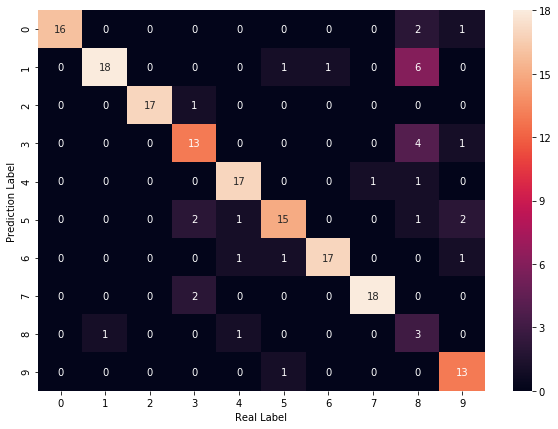

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:13 index:[1] real:5
#1 min_error:10 index:[2] real:2
#2 min_error:7 index:[1] real:8
#3 min_error:3 index:[0] real:0
#4 min_error:6 index:[1] real:1
#5 min_error:7 index:[7] real:7
#6 min_error:1 index:[6] real:6
#7 min_error:7 index:[3] real:3
#8 min_error:5 index:[2] real:2
#9 min_error:5 index:[1] real:1
#10 min_error:11 index:[7] real:7
#11 min_error:15 index:[7 8 9] real:4
#12 min_error:6 index:[6] real:6
#13 min_error:7 index:[3] real:3
#14 min_error:5 index:[1] real:1
#15 min_error:12 index:[3] real:3
#16 min_error:16 index:[5] real:9
#17 min_error:8 index:[1] real:1
#18 min_error:10 index:[7] real:7
#19 min_error:3 index:[6] real:6
#20 min_error:13 index:[0] real:8
#21 min_error:5 index:[4] real:4
#22 min_error:4 index:[3] real:3
#23 min_error:6 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:9 index:[5] real:5
#27 min_error:7 index:[3] real:3
#28 min_error:10 index:[1] real:6
#29 min_error:12 index:[9] real:9
#30 mi

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.8214526214526213

In [17]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.12222222222222222
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.24444444444444444
Accuracy on training set: 0.45
Accuracy on training set: 0.4666666666666667
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6444444444444445
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6388888888888888
Accuracy on training set: 0.65
Accuracy on training set: 0.7
Accuracy on training set: 0.7111111111111111
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7611111111111111
Accuracy on training set: 0.75
Accuracy on training set: 0.7777777777777778
Accuracy on training set: 0.7777777777777778
Accuracy on training set: 0.7833333333333333
Accuracy on training set: 0.7888888888888889
Accuracy on training set: 0.7944444444444444
Accuracy on trainin

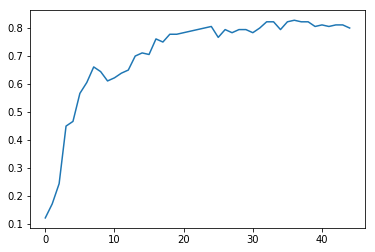

In [18]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
list_acc

[0.12222222222222222,
 0.17222222222222222,
 0.24444444444444444,
 0.45,
 0.4666666666666667,
 0.5666666666666667,
 0.6055555555555555,
 0.6611111111111111,
 0.6444444444444445,
 0.6111111111111112,
 0.6222222222222222,
 0.6388888888888888,
 0.65,
 0.7,
 0.7111111111111111,
 0.7055555555555556,
 0.7611111111111111,
 0.75,
 0.7777777777777778,
 0.7777777777777778,
 0.7833333333333333,
 0.7888888888888889,
 0.7944444444444444,
 0.8,
 0.8055555555555556,
 0.7666666666666667,
 0.7944444444444444,
 0.7833333333333333,
 0.7944444444444444,
 0.7944444444444444,
 0.7833333333333333,
 0.8,
 0.8222222222222222,
 0.8222222222222222,
 0.7944444444444444,
 0.8222222222222222,
 0.8277777777777777,
 0.8222222222222222,
 0.8222222222222222,
 0.8055555555555556,
 0.8111111111111111,
 0.8055555555555556,
 0.8111111111111111,
 0.8111111111111111,
 0.8]

In [20]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8484848484848485
Avg Base Learner:0.8214526214526213
